In [1]:
import numpy as np
import tensorflow 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout 
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
x_train = train_datagen.flow_from_directory(
    r'/content/drive/MyDrive/IBM/Dataset-PNT2022TMID01549/Dataset/TRAIN_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

x_test = test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/IBM/Dataset-PNT2022TMID01549/Dataset/TEST_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 2656 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [7]:
model = Sequential()

In [8]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

In [9]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax'))

In [10]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [11]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
classifier.fit_generator(
        generator=x_train,steps_per_epoch = len(x_train),
        epochs=10, validation_data=x_test,validation_steps = len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
532/532 [==============================] - 668s 1s/step - loss: 0.1538 - accuracy: 0.9465 - val_loss: 0.1689 - val_accuracy: 0.9365
Epoch 2/10
532/532 [==============================] - 28s 52ms/step - loss: 0.0364 - accuracy: 0.9872 - val_loss: 0.0734 - val_accuracy: 0.9735
Epoch 3/10
532/532 [==============================] - 28s 52ms/step - loss: 1.8290e-04 - accuracy: 1.0000 - val_loss: 0.0589 - val_accuracy: 0.9725
Epoch 4/10
532/532 [==============================] - 28s 52ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.1060 - val_accuracy: 0.9725
Epoch 5/10
532/532 [==============================] - 28s 52ms/step - loss: 1.1173e-04 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 0.9858
Epoch 6/10
532/532 [==============================] - 28s 52ms/step - loss: 3.5457e-05 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 0.9801
Epoch 7/10
532/532 [==============================] - 28s 52ms/step - loss: 0.0346 - accuracy: 0.9906 - val_loss: 0.0223 - va

In [13]:
classifier.save('nutrition.h5')

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

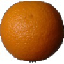

In [15]:
img = image.load_img("/content/drive/MyDrive/IBM/Dataset-PNT2022TMID01549/Dataset/TEST_SET/ORANGE/30_100.jpg",target_size= (64,64))
img

In [16]:
x=image.img_to_array(img)

In [17]:
x

array([[[255., 255., 242.],
        [255., 255., 251.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 251.],
        [254., 253., 251.],
        [255., 253., 254.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 254., 255.],
        [255., 253., 254.],
        [255., 253., 254.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [18]:
x.ndim

3

In [19]:

x=np.expand_dims(x,axis=0)

In [20]:
x.ndim

4

In [21]:

pred = classifier.predict(x)

1/1 [==============================] - 0s 112ms/step


In [22]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [23]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'ORANGE'